### Viktor Penchev (230966576)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data

### Loading and preprocessing

In [2]:
# Load data
data = pd.read_csv('data/CREDITCARD/credit_card_dataset.csv')
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members,Rejected
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,NaN,2,1
1,5008865,F,Y,Y,2,135000.0,Working,Secondary / secondary special,Married,House / apartment,-15761.0,-3173,Laborers,4,0
2,5008889,F,N,Y,0,247500.0,Commercial associate,Higher education,Separated,Rented apartment,-17016.0,-1347,Core staff,1,0
3,5009000,M,Y,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-9927.0,-828,Drivers,2,0
4,5009023,F,N,Y,2,216000.0,State servant,Higher education,Married,House / apartment,-15444.0,-3112,NaN,4,0


In [3]:
data.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Family_Members,Rejected
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,15.000000,1.000000


In [4]:
data.groupby('Rejected').apply(lambda x: x.isna().sum())

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members,Rejected
Rejected,,,,,,,,,,,,,,,
0,0,2,0,0,0,15,0,0,0,0,20,0,431,0,0
1,0,5,0,0,0,8,0,0,0,0,2,0,57,0,0


In [5]:
data['Birthday_count'] = np.floor(-data['Birthday_count'] / 365)
data['Type_Occupation'] = data['Type_Occupation'].fillna('Unknown')
data['Birthday_count'] = data['Birthday_count'].fillna(data['Birthday_count'].mean())
data['GENDER'] = data['GENDER'].fillna('Unknown')

# Drop duplicates
data = data.drop('Ind_ID', axis=1)
data = data.dropna()

In [6]:
print(f"Number of rejects: {len(data[data['Rejected'] == 1])}")
print(f"Number of accepts: {len(data[data['Rejected'] == 0])}")
print(f"Percentage of rejects: {len(data[data['Rejected'] == 1]) / len(data) * 100:.2f}%")

Number of rejects: 167
Number of accepts: 1358
Percentage of rejects: 10.95%


### Exploratory analysis

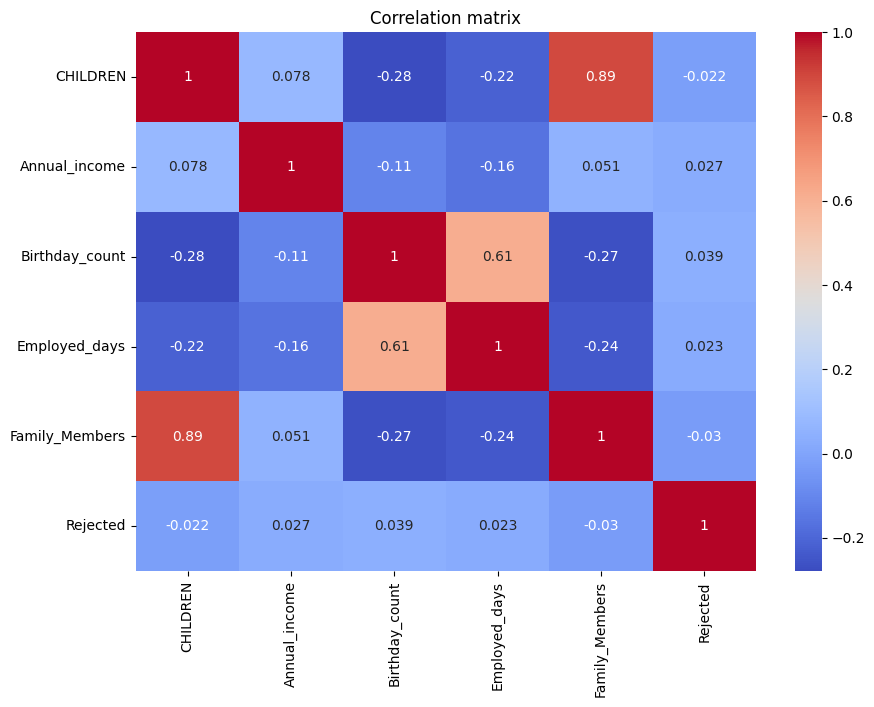

In [7]:
import seaborn as sns

# Get numeric columns
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

# Correlation matrix
corr = data[numeric_columns].corr()
corr.style.background_gradient(cmap='coolwarm')

# Plot correlation matrix
plt.figure(figsize=(10, 7))
plt.title('Correlation matrix')
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

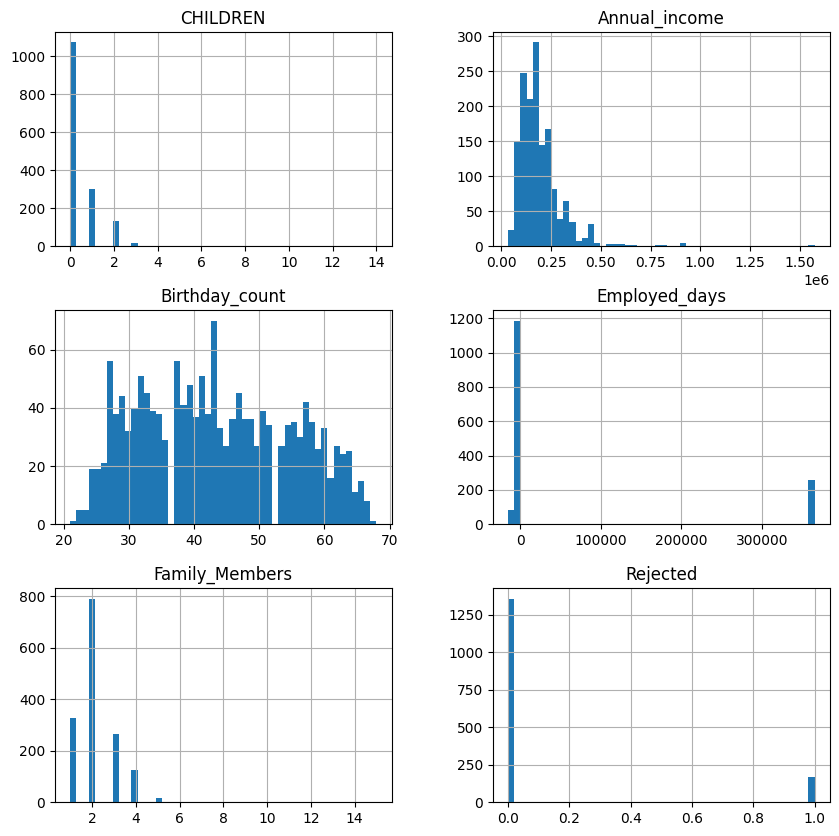

In [8]:
# Plot distribution of numeric columns
data[numeric_columns].hist(figsize=(10, 10), bins=50);

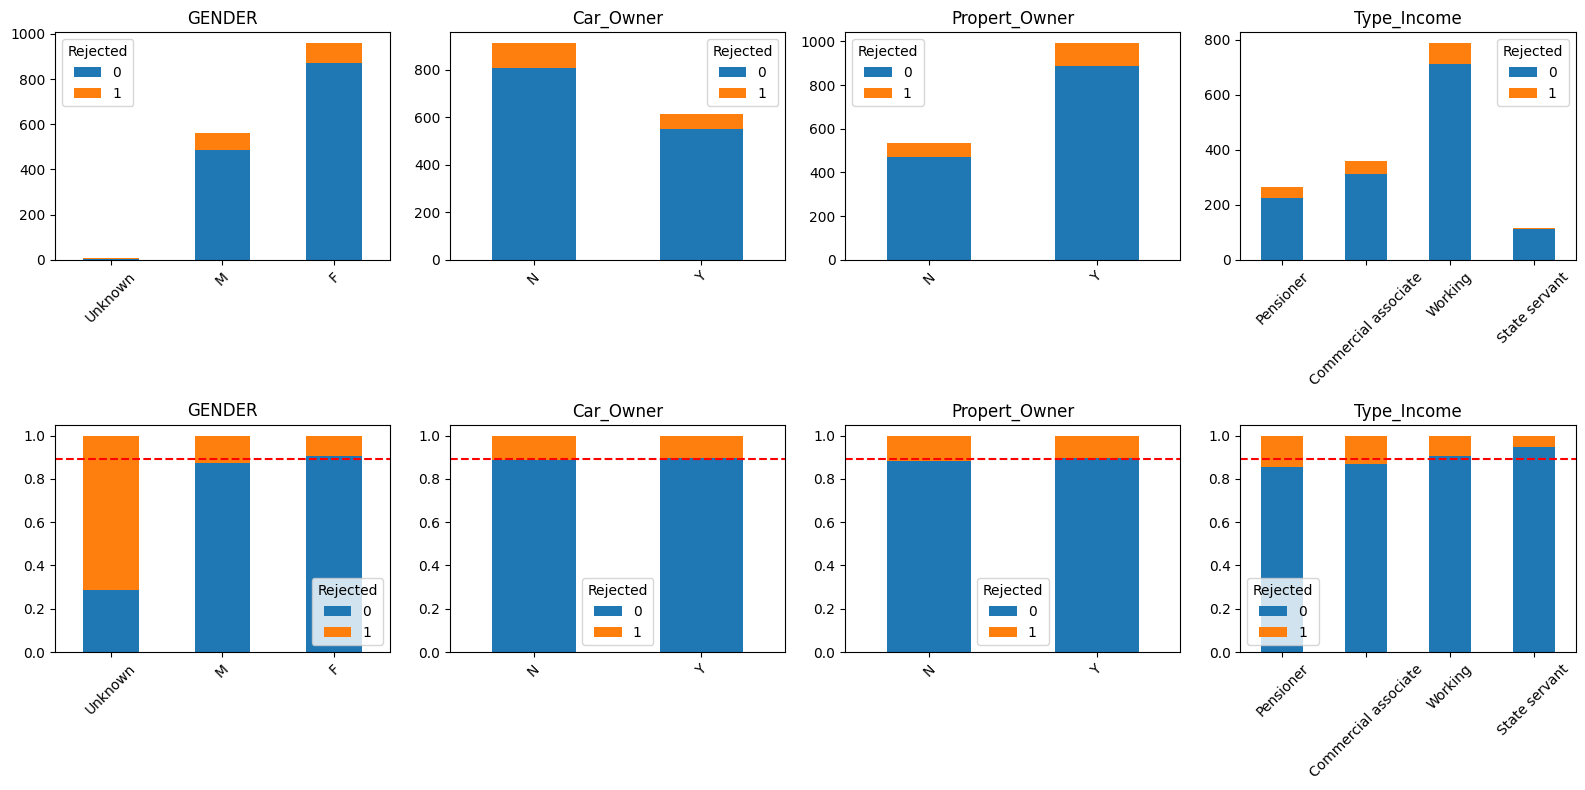

In [9]:
# Plot distribution of categorical columns
categorical_columns = data.select_dtypes(exclude=np.number).columns.tolist()
mean_rejects = 1 - data['Rejected'].mean()

fig, ax = plt.subplots(2, int(len(categorical_columns)/2), figsize=(4*len(categorical_columns)/2, 8))
for i, col in enumerate(categorical_columns[:4]):
    data_grouped = data.groupby([col, 'Rejected']).size().unstack(fill_value=0)
    data_grouped_proportions = data_grouped.div(data_grouped.sum(axis=1), axis=0)
    sorted_indices = data_grouped_proportions.sort_values(by=1, ascending=False).index

    # Left plot
    data_grouped.loc[sorted_indices].plot(kind='bar', stacked=True, ax=ax[0, i])
    ax[0, i].set_title(col)
    ax[0, i].set_xlabel('')
    ax[0, i].set_xticklabels(ax[0, i].get_xticklabels(), rotation=45)

    # Right plot
    data_grouped_proportions.loc[sorted_indices].plot(kind='bar', stacked=True, ax=ax[1, i])
    ax[1, i].set_title(col)
    ax[1, i].set_xlabel('')
    ax[1, i].axhline(y=mean_rejects, color='r', linestyle='--', label='Mean proprtion of accepts')
    ax[1, i].set_xticklabels(ax[1, i].get_xticklabels(), rotation=45)

plt.tight_layout()

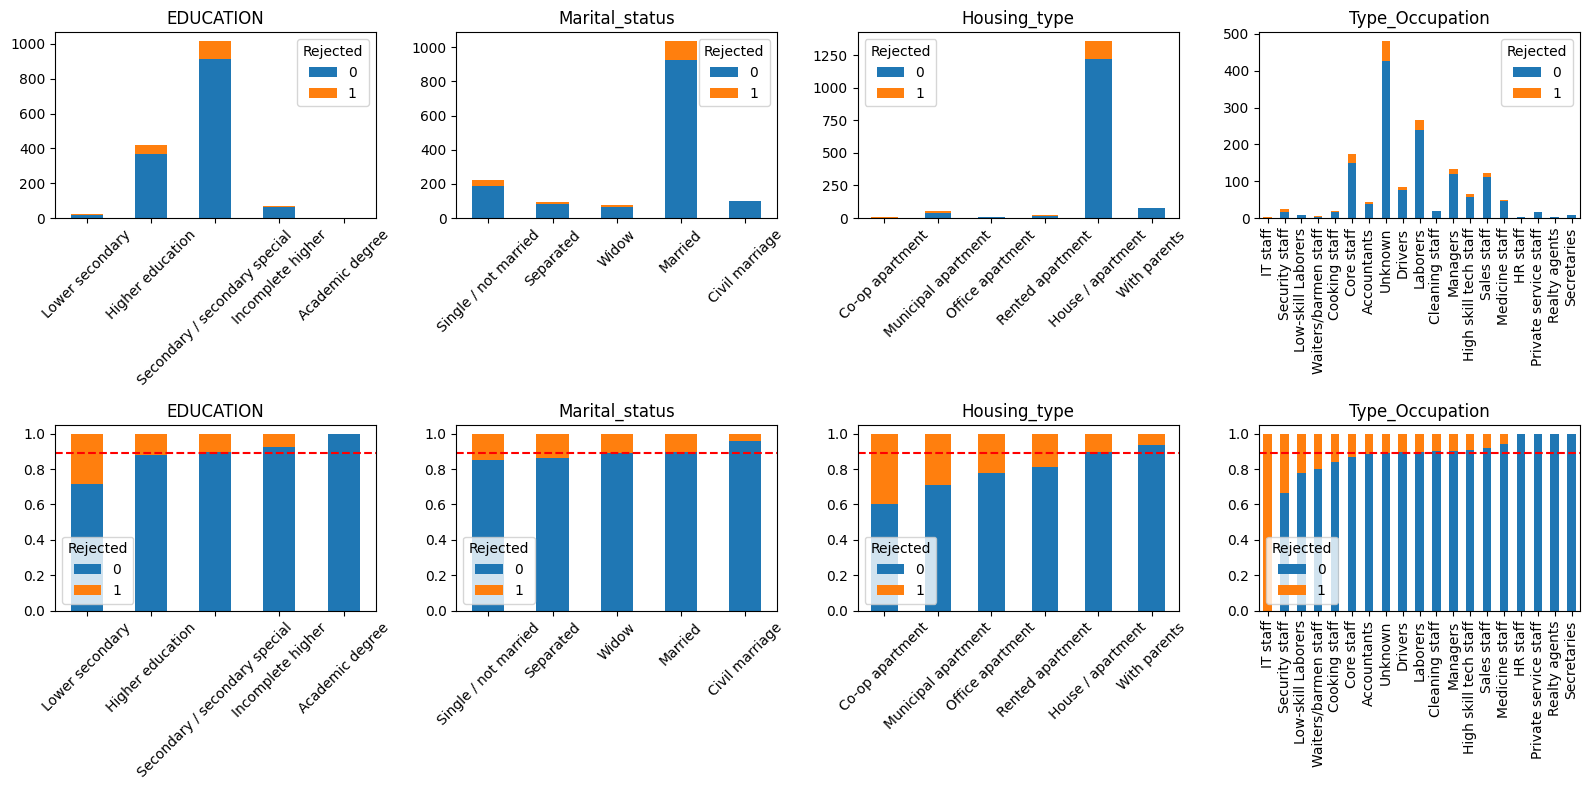

In [10]:
# Plot distribution of categorical columns
categorical_columns = data.select_dtypes(exclude=np.number).columns.tolist()
mean_rejects = 1 - data['Rejected'].mean()

fig, ax = plt.subplots(2, int(len(categorical_columns)/2), figsize=(4*len(categorical_columns)/2, 8))
for i, col in enumerate(categorical_columns[4:]):
    data_grouped = data.groupby([col, 'Rejected']).size().unstack(fill_value=0)
    data_grouped_proportions = data_grouped.div(data_grouped.sum(axis=1), axis=0)
    sorted_indices = data_grouped_proportions.sort_values(by=1, ascending=False).index

    # Left plot
    data_grouped.loc[sorted_indices].plot(kind='bar', stacked=True, ax=ax[0, i])
    ax[0, i].set_title(col)
    ax[0, i].set_xlabel('')
    ax[0, i].set_xticklabels(ax[0, i].get_xticklabels(), rotation=45)

    # Right plot
    data_grouped_proportions.loc[sorted_indices].plot(kind='bar', stacked=True, ax=ax[1, i])
    ax[1, i].set_title(col)
    ax[1, i].set_xlabel('')
    ax[1, i].axhline(y=mean_rejects, color='r', linestyle='--', label='Mean proprtion of accepts')
    ax[1, i].set_xticklabels(ax[1, i].get_xticklabels(), rotation=45)
    if i == 3:
        ax[0, i].set_xticklabels(ax[0, i].get_xticklabels(), rotation=90)
        ax[1, i].set_xticklabels(ax[1, i].get_xticklabels(), rotation=90)

plt.tight_layout()

# Modelling 

### SMOTE - Synthetic Minority Over-sampling Technique

In [11]:
def SMOTE(data, N=2, k=5, minority_class='Rejected'):
    if N == 0:
        return None
    # Separate the minority class
    minority_data = data[data[minority_class] == 1]
    categorical_columns = [col for col in data.columns if data[col].dtype == 'object']
    numerical_discrete_columns = [col for col in data.columns if data[col].dtype != 'object' and len(data[col].unique()) < 40]
    # Drop the minority class column
    minority_data = minority_data.drop(minority_class, axis=1)
    # Create dummy variables for categorical features
    minority_data = pd.get_dummies(minority_data)
    attributes = minority_data.columns
    # Standardise the data and save the mean and standard deviation
    mean = minority_data.mean()
    std = minority_data.std()
    minority_data = (minority_data - mean) / std
    minority_data = np.array(minority_data)
    # SMOTE variables
    n_generated = 0
    synthetic_data = np.array([])
    # For each minority sample
    for i in range(len(minority_data)):
        # Find the distances to all other samples
        distances = np.linalg.norm(minority_data - minority_data[i], axis=1)
        neighbours = distances.argsort()[1:k+1]
        # For each neighbour we populate the synthetic data
        samples_to_generate = N
        while samples_to_generate > 0:
            # Choose a random neighbour
            neighbour = np.random.choice(neighbours)
            # Generate a random sample between the two points
            diff = np.array(minority_data[neighbour]) - np.array(minority_data[i])
            gap = np.random.random()
            random_sample = np.array(minority_data[i]) + gap * diff
            # Add the sample to the synthetic data
            synthetic_data = np.append(synthetic_data, random_sample)
            samples_to_generate -= 1
            n_generated += 1

    synthetic_data = synthetic_data.reshape(n_generated, len(attributes))
    # De-standardise the data
    for i in range(len(attributes)):
        synthetic_data[:,i] = synthetic_data[:,i] * std[i] + mean[i]

    # Convert back to a dataframe
    synthetic_data = pd.DataFrame(synthetic_data, columns=attributes)
    # Add the minority class column
    synthetic_data[minority_class] = 1

    # Reverse the one-hot encoding
    for col in categorical_columns:
        # Merge columns whose names start with col
        cols = [c for c in synthetic_data.columns if col in c]
        # Return the name of the column with max value
        max_value_col = synthetic_data[cols].idxmax(axis=1)

        synthetic_data[col] = max_value_col.apply(lambda x: x.split(f'{col}_')[1])
        # Drop the columns
        synthetic_data = synthetic_data.drop(cols, axis=1)

    # Convert discrete numerical columns to int
    for col in numerical_discrete_columns:
        synthetic_data[col] = synthetic_data[col].apply(lambda x: round(x))
        
    return synthetic_data

### Bootstraping

In [12]:
# Let's define a function to draw bootstrap samples for training while leaving the undrawn samples for testing
def bootstrap_sample(X, y, generated_X=None, generated_y=None):
    assert len(X) == len(y), "X and y must have the same length."
    assert (generated_X is None and generated_y is None) or len(generated_X) == len(generated_y), "generated_X and generated_y must have the same length."

    # If generated data is not provided, we use the original data
    if generated_X is None or generated_y is None:
        # Generate random indices
        train_indices = list(np.random.choice(range(len(X)), len(X), replace=True))
        test_indices = list(set(range(len(X))) - set(train_indices))
        return X.iloc[train_indices], y.iloc[train_indices], X.iloc[test_indices], y.iloc[test_indices]
    
    # If generated data is provided, we use the original data and the generated data
    all_data = pd.concat([X, generated_X])
    all_labels = pd.concat([y, generated_y])

    train_indices = list(np.random.choice(range(len(all_data)), len(all_data), replace=True))
    # Remove the generated data from the training set
    train_indices_og = [i for i in train_indices if i < len(X)]
    test_indices = list(set(range(len(X))) - set(train_indices_og))

    return all_data.iloc[train_indices], all_labels.iloc[train_indices], X.iloc[test_indices], y.iloc[test_indices]

In [13]:
# Test the SMOTE function
generated_data = SMOTE(data, N=7, k=10)

# Test the bootstrap_sample function
all_data = pd.concat([data, generated_data])
X_train, y_train, X_test, y_test = bootstrap_sample(data.drop('Rejected', axis=1), data['Rejected'], generated_data.drop('Rejected', axis=1), generated_data['Rejected'])

print("SMOTE parameters: N=2, k=5")
print("Number of training samples:", len(X_train))
print("+-- Proportion of rejects:", len(y_train[y_train == 1]) / len(y_train))
print("Number of testing samples:", len(X_test))
print("+-- Proportion of rejects:", len(y_test[y_test == 1]) / len(y_test))

SMOTE parameters: N=2, k=5
Number of training samples: 2694
+-- Proportion of rejects: 0.5
Number of testing samples: 556
+-- Proportion of rejects: 0.10971223021582734


### F1 Score

In [14]:
def f1_score(y_true, y_pred):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(len(y_true)):
        if y_pred[i] == True and y_true.iloc[i] == True:
            TP += 1
        elif y_pred[i] == False and y_true.iloc[i] == False:
            TN += 1
        elif y_pred[i] == True and y_true.iloc[i] == False:
            FP += 1
        elif y_pred[i] == False and y_true.iloc[i] == True:
            FN += 1
    return 2 * TP / (2 * TP + FP + FN)

### K-Fold Cross Validation

In [15]:
def k_fold_cross_validation(model, X_kfold, y_kfold, X_gen=None, y_gen=None, n_splits=5):

    all_data = pd.concat([X_kfold, y_kfold], axis=1)
    # Shuffle the data
    all_data = all_data.sample(frac=1).reset_index(drop=True)
    X_kfold = all_data.drop('Rejected', axis=1)
    y_kfold = all_data['Rejected']

    # Calculate the size of each split
    split_size = len(X_kfold) // n_splits

    # Initialize a list to store the splits
    splits = []
    splits_gen = []

    # If generated data is provided, we use both the original data and the generated data
    if X_gen is not None and y_gen is not None:
        split_size_generated = len(X_gen) // n_splits

        all_data_gen = pd.concat([X_gen, y_gen], axis=1)
        # Shuffle the data
        all_data_gen = all_data_gen.sample(frac=1).reset_index(drop=True)
        X_gen = all_data_gen.drop('Rejected', axis=1)
        y_gen = all_data_gen['Rejected']
        
        for i in range(n_splits):
            splits_gen.append((X_gen[i*split_size_generated:(i+1)*split_size_generated], y_gen[i*split_size_generated:(i+1)*split_size_generated]))

    # Create the splits
    for i in range(n_splits):
        splits.append((X_kfold[i*split_size:(i+1)*split_size], y_kfold[i*split_size:(i+1)*split_size]))

    # Initialize lists to store the accuracies and f1 scores
    accuracies = []
    f1_scores = []

    # Now we can iterate over the splits and use each one as a test set and the rest as a training set
    for i in range(n_splits):
        print(f"+ Fold {i+1}/{n_splits}")
        X_kfold_test, y_kfold_test = splits[i]
        X_kfold_train = pd.concat([split[0] for j, split in enumerate(splits) if j != i])
        y_kfold_train = pd.concat([split[1] for j, split in enumerate(splits) if j != i])
        if X_gen is not None and y_gen is not None:
            X_gen_kfold_train = pd.concat([split[0] for j, split in enumerate(splits_gen) if j != i])
            y_gen_kfold_train = pd.concat([split[1] for j, split in enumerate(splits_gen) if j != i])

        if X_gen is not None and y_gen is not None:
            model.trees = []
            model.train(X_kfold_train, y_kfold_train, X_gen_kfold_train, y_gen_kfold_train)
        else:
            model.trees = []
            model.train(X_kfold_train, y_kfold_train)

        # Evaluate the model on the test set
        accuracy_k, f1_k = model.evaluate_accuracy(X_kfold_test, y_kfold_test)
        accuracies.append(accuracy_k)
        f1_scores.append(f1_k)
        print(f"+ Accuracy: {accuracy_k:.2f}, F1 score: {f1_k:.2f}")

    print(f"Average accuracy: {np.mean(accuracies):.2f}, average F1 score: {np.mean(f1_scores):.2f}")
    
    return accuracies, f1_scores

### Decision tree from scratch

In [16]:
def entropy(p):
    if p == 0 or p == 1:
        return 0
    return -p * np.log(p) - (1 - p) * np.log(1 - p)

def gini(p):
    return 2 * p * (1 - p)

def misclassification(p):
    return min(p, 1 - p)

def information_gain(left_data, right_data, criterion_function='entropy'):
    if criterion_function == 'entropy':
        criterion_function = entropy
    elif criterion_function == 'gini':
        criterion_function = gini
    elif criterion_function == 'misclassification':
        criterion_function = misclassification
    else:
        raise ValueError("Invalid criterion function.")
    parent_data = np.concatenate((left_data, right_data), axis=0)
    partent_impurity = criterion_function(parent_data.mean() if len(parent_data) > 0 else 0)
    left_impurity = criterion_function(left_data.mean() if len(left_data) > 0 else 0)
    right_impurity = criterion_function(right_data.mean() if len(right_data) > 0 else 0)
    return partent_impurity - (len(left_data) / len(parent_data)) * left_impurity - (len(right_data) / len(parent_data)) * right_impurity

In [17]:
# Test the information gain function
print("Information gain for the splits [:10] and [10:20] of the Rejected column:")
print(f"Entropy: {information_gain(data['Rejected'].iloc[0:10], data['Rejected'].iloc[10:20], 'entropy')}")
print(f"Gini: {information_gain(data['Rejected'].iloc[0:10], data['Rejected'].iloc[10:20], 'gini')}")
print(f"Misclassification: {information_gain(data['Rejected'].iloc[0:10], data['Rejected'].iloc[10:20], 'misclassification')}")

Information gain for the splits [:10] and [10:20] of the Rejected column:
Entropy: 0.035973756650148486
Gini: 0.0049999999999999906
Misclassification: 0.0


In [24]:
class RandomForest():

    def __init__(self, name='forest', n_trees=100, max_features=np.inf, max_depth=np.inf, min_samples_split=2, criterion_function='entropy', bootstrap=True, decision_threshold=0.5):
        self.name = name
        self.n_trees = n_trees
        self.max_features = max_features
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.criterion_function = criterion_function
        self.bootstrap = bootstrap
        self.decision_threshold = decision_threshold
        self.trees = []
        self.depths = []

    def _terminal_node(self, y):
        return y.mean() >= self.decision_threshold
    
    def _get_best_split(self, X, y):
        # Draw random features depending on max_features
        if self.max_features == np.inf:
            features = X.columns
        else:
            features = np.random.choice(X.columns, self.max_features, replace=False)

        best_info_gain = -999
        best_feature = None
        for feature in features:
            # Find split for numerical features
            if X[feature].dtype != 'object':
                for split in X[feature].unique():
                    left_data = y[X[feature] <= split]
                    right_data = y[X[feature] > split]
                    info_gain = information_gain(left_data, right_data, self.criterion_function)
                    if info_gain > best_info_gain:
                        best_info_gain = info_gain
                        best_feature = feature
                        best_split = split
                        left_data_best = (X.loc[X[feature] <= split], y[X[feature] <= split])
                        right_data_best = (X.loc[X[feature] > split], y[X[feature] > split])
            # Find split for categorical features
            else:
                for category in X[feature].unique():
                    left_data = y[X[feature] == category]
                    right_data = y[X[feature] != category]
                    info_gain = information_gain(left_data, right_data, self.criterion_function)
                    if info_gain > best_info_gain:
                        best_info_gain = info_gain
                        best_feature = feature
                        best_split = category
                        left_data_best = (X.loc[X[feature] == category], y[X[feature] == category])
                        right_data_best = (X.loc[X[feature] != category], y[X[feature] != category])

        node = {
            'info_gain': best_info_gain,
            'feature': best_feature,
            'split': best_split,
            'left_split': left_data_best,
            'right_split': right_data_best
        }

        return node
    
    def _split_node(self, node, depth):
        left_X, left_y = node['left_split']
        right_X, right_y = node['right_split']
        del node['left_split']
        del node['right_split']
        
        if node['info_gain'] == 0:
            node['left_child'] = self._terminal_node(pd.concat([left_y, right_y]))
            node['right_child'] = self._terminal_node(pd.concat([left_y, right_y]))
            return
        
        if depth >= self.max_depth:
            node['left_child'] = self._terminal_node(left_y)
            node['right_child'] = self._terminal_node(right_y)
            return

        if len(left_y) < self.min_samples_split:
            node['left_child'] = self._terminal_node(left_y)
        else:
            node['left_child'] = self._get_best_split(left_X, left_y)
            self._split_node(node['left_child'], depth + 1)

        if len(right_y) < self.min_samples_split:
            node['right_child'] = self._terminal_node(right_y)
        else:
            node['right_child'] = self._get_best_split(right_X, right_y)
            self._split_node(node['right_child'], depth + 1)
        
    def _generate_tree(self, X, y):
        root = self._get_best_split(X, y)
        self._split_node(root, 1)

        return root

    def train(self, X, y, generated_X=None, generated_y=None):
        print(f"+-- Training trees {len(self.trees) + 1} to {len(self.trees) + self.n_trees}...")
        if self.bootstrap:
            for _ in range(self.n_trees):
                X_train, y_train, X_test, y_test = bootstrap_sample(X, y, generated_X, generated_y)
                tree = self._generate_tree(X_train, y_train)
                self.trees.append(tree)
                print(f"|   +-- Tree {len(self.trees)} trained, bootstrapped test accuracy: {self.evaluate_accuracy(X_test, y_test)[0]:.2f} f1: {self.evaluate_accuracy(X_test, y_test)[1]:.2f}")
        else:
            for _ in range(self.n_trees):
                X_train = pd.concat([X, generated_X])
                y_train = pd.concat([y, generated_y])
                tree = self._generate_tree(X_train, y_train)
                self.trees.append(tree)
                print(f"|   +-- Tree {len(self.trees)} trained.")            

    def _tree_row_prediction(self, X, node):
        if not isinstance(node, dict):
            return node
        
        feature = node['feature']
        split = node['split']

        if isinstance(X[feature], str):
            if X[feature] == split:
                return self._tree_row_prediction(X, node['left_child'])
            else:
                return self._tree_row_prediction(X, node['right_child'])
        else:
            if X[feature] <= split:
                return self._tree_row_prediction(X, node['left_child'])
            else:
                return self._tree_row_prediction(X, node['right_child'])
            
    def _tree_prediction(self, X, node):
        return X.apply(lambda row: self._tree_row_prediction(row, node), axis=1)
    
    # Prediction of the whole forest
    def predict(self, X):
        predictions = []
        for tree in self.trees:
            predictions.append(self._tree_prediction(X, tree))
        return np.mean(predictions, axis=0) >= 0.5
    
    # Let's now define a function to evaluate the test accuracy of the whole forest
    def evaluate_accuracy(self, X_test, y_test):

        y_pred = self.predict(X_test)
        f1 = f1_score(y_test, y_pred)
        return np.mean(y_pred == y_test), f1
    
    def get_tree_depth(self, node):
        if not isinstance(node, dict):
            return 1
        return 1 + max(self.get_tree_depth(node['left_child']), self.get_tree_depth(node['right_child']))

# Experiments

In [20]:
X_train = data.drop('Rejected', axis=1)
y_train = data['Rejected']

### Tree size

In [19]:
results_size = pd.DataFrame(columns=['name', 'n_trees', 'max_depth', 'min_samples_split', 'decision_threshold', 'smote_N', 'accuracy', 'f1'])

In [21]:
rf_1 = RandomForest(name='Randomforest_xs', n_trees=100, max_features=3, max_depth=5, min_samples_split=10)
rf_2 = RandomForest(name='Randomforest_s', n_trees=100, max_features=5, max_depth=10, min_samples_split=5)
rf_3 = RandomForest(name='Randomforest_m', n_trees=100, max_features=7, max_depth=15, min_samples_split=2)
rf_4 = RandomForest(name='Randomforest_l', n_trees=100, max_features=10, max_depth=20, min_samples_split=2)


models = [rf_1, rf_2, rf_3, rf_4]
for model in models:
    print(f"Training {model.name}...")
    accuracies, f1_scores = k_fold_cross_validation(model, X_train, y_train, n_splits=4)
    results_size.loc[len(results_size)] = {'name': model.name,'n_trees': model.n_trees, 'max_depth': model.max_depth, 'min_samples_split': model.min_samples_split, 'decision_threshold': model.decision_threshold, 'smote_N': 0, 'accuracy': np.mean(accuracies), 'f1': np.mean(f1_scores)}
    print("")

Training Randomforest_xs...
+ Fold 1/4
+-- Training trees 1 to 100...
|   +-- Tree 1 trained, bootstrapped test accuracy: 0.89 f1: 0.04
|   +-- Tree 2 trained, bootstrapped test accuracy: 0.88 f1: 0.22
|   +-- Tree 3 trained, bootstrapped test accuracy: 0.90 f1: 0.09
|   +-- Tree 4 trained, bootstrapped test accuracy: 0.90 f1: 0.13
|   +-- Tree 5 trained, bootstrapped test accuracy: 0.91 f1: 0.00
|   +-- Tree 6 trained, bootstrapped test accuracy: 0.86 f1: 0.00
|   +-- Tree 7 trained, bootstrapped test accuracy: 0.89 f1: 0.00
|   +-- Tree 8 trained, bootstrapped test accuracy: 0.87 f1: 0.00
|   +-- Tree 9 trained, bootstrapped test accuracy: 0.87 f1: 0.00
|   +-- Tree 10 trained, bootstrapped test accuracy: 0.90 f1: 0.00
|   +-- Tree 11 trained, bootstrapped test accuracy: 0.89 f1: 0.00
|   +-- Tree 12 trained, bootstrapped test accuracy: 0.89 f1: 0.00
|   +-- Tree 13 trained, bootstrapped test accuracy: 0.88 f1: 0.00
|   +-- Tree 14 trained, bootstrapped test accuracy: 0.89 f1: 0.00
|

KeyboardInterrupt: 

In [25]:
results_size.to_csv('results/results_size.csv', index=False)

### Decision threshold

Here, I found out I had made a mistake which rendered my results useless. I had no time to run the experiments again, so I will just show the code.

In [25]:
results_dt = pd.DataFrame(columns=['name', 'n_trees', 'max_depth', 'min_samples_split', 'decision_threshold', 'smote_N', 'accuracy', 'f1'])

In [26]:
# Test decision threshold
rf_dt5 = RandomForest(name='Randomforest_dt5', n_trees=100, max_features=5, max_depth=10, min_samples_split=2, decision_threshold=0.5)
rf_dt4 = RandomForest(name='Randomforest_dt6', n_trees=100, max_features=5, max_depth=10, min_samples_split=2, decision_threshold=0.4)
rf_dt3 = RandomForest(name='Randomforest_dt7', n_trees=100, max_features=5, max_depth=10, min_samples_split=2, decision_threshold=0.3)
rf_dt2 = RandomForest(name='Randomforest_dt8', n_trees=100, max_features=5, max_depth=10, min_samples_split=2, decision_threshold=0.2)
rf_dt1 = RandomForest(name='Randomforest_dt9', n_trees=100, max_features=5, max_depth=10, min_samples_split=2, decision_threshold=0.1)

models = [rf_dt1, rf_dt2, rf_dt3, rf_dt4, rf_dt5]
for model in models:
    print(f"Training {model.name}...")
    accuracies, f1_scores = k_fold_cross_validation(model, X_train, y_train, n_splits=4)
    results_dt.loc[len(results_dt)] = {'name': model.name,'n_trees': model.n_trees, 'max_depth': model.max_depth, 'min_samples_split': model.min_samples_split, 'decision_threshold': model.decision_threshold, 'smote_N': 0, 'accuracy': np.mean(accuracies), 'f1': np.mean(f1_scores)}
    print("")

Training Randomforest_dt9...
+ Fold 1/4
+-- Training trees 1 to 100...
|   +-- Tree 1 trained, bootstrapped test accuracy: 0.71 f1: 0.32
|   +-- Tree 2 trained, bootstrapped test accuracy: 0.49 f1: 0.26
|   +-- Tree 3 trained, bootstrapped test accuracy: 0.69 f1: 0.39
|   +-- Tree 4 trained, bootstrapped test accuracy: 0.61 f1: 0.35
|   +-- Tree 5 trained, bootstrapped test accuracy: 0.83 f1: 0.62
|   +-- Tree 6 trained, bootstrapped test accuracy: 0.74 f1: 0.39
|   +-- Tree 7 trained, bootstrapped test accuracy: 0.88 f1: 0.64
|   +-- Tree 8 trained, bootstrapped test accuracy: 0.86 f1: 0.62
|   +-- Tree 9 trained, bootstrapped test accuracy: 0.89 f1: 0.66
|   +-- Tree 10 trained, bootstrapped test accuracy: 0.89 f1: 0.63
|   +-- Tree 11 trained, bootstrapped test accuracy: 0.91 f1: 0.69
|   +-- Tree 12 trained, bootstrapped test accuracy: 0.90 f1: 0.63
|   +-- Tree 13 trained, bootstrapped test accuracy: 0.94 f1: 0.78
|   +-- Tree 14 trained, bootstrapped test accuracy: 0.93 f1: 0.71


In [27]:
results_dt.to_csv('results/results_dt.csv', index=False)

In [32]:
results_dt

,name,n_trees,max_depth,min_samples_split,decision_threshold,smote_N,accuracy,f1
0,Randomforest_dt9,100,10,2,0.1,0,0.849738,0.392431
1,Randomforest_dt8,100,10,2,0.2,0,0.903543,0.295475
2,Randomforest_dt7,100,10,2,0.3,0,0.898950,0.200231
3,Randomforest_dt6,100,10,2,0.4,0,0.898950,0.203543
4,Randomforest_dt5,100,10,2,0.5,0,0.894357,0.137210


### Generated data and threshold

Unfortunalety, I don't have time to train all of these models. Each one takes at least 30 minutes to train. I have commented the ones I didn't manage to train.

In [33]:
results_gen = pd.DataFrame(columns=['name', 'n_trees', 'max_depth', 'min_samples_split', 'decision_threshold', 'smote_N', 'accuracy', 'f1'])

In [34]:
rf_gen_1 = RandomForest(name='Randomforest_gen_1', n_trees=100, max_features=7, max_depth=15, min_samples_split=2, decision_threshold=0.5)
rf_gen_2 = RandomForest(name='Randomforest_gen_2', n_trees=100, max_features=7, max_depth=15, min_samples_split=2, decision_threshold=0.35)
rf_gen_3 = RandomForest(name='Randomforest_gen_3', n_trees=100, max_features=7, max_depth=15, min_samples_split=2, decision_threshold=0.2)
rf_gen_4 = RandomForest(name='Randomforest_gen_4', n_trees=100, max_features=7, max_depth=15, min_samples_split=2, decision_threshold=0.5)
rf_gen_5 = RandomForest(name='Randomforest_gen_5', n_trees=100, max_features=7, max_depth=15, min_samples_split=2, decision_threshold=0.35)
rf_gen_6 = RandomForest(name='Randomforest_gen_6', n_trees=100, max_features=7, max_depth=15, min_samples_split=2, decision_threshold=0.2)

models = [(rf_gen_1, 2), (rf_gen_2, 2), (rf_gen_3, 2), (rf_gen_4, 4), (rf_gen_5, 4), (rf_gen_6, 4)]
for model, N in models:
    print(f"Training {model.name}...")
    # Shuffle generated data
    generated_data = SMOTE(data, N=N, k=7)
    if generated_data is None:
        generated_X = None
        generated_y = None
    else:
        generated_X = generated_data.drop('Rejected', axis=1)
        generated_y = generated_data['Rejected']

    # K-fold cross validation
    accuracies, f1_scores = k_fold_cross_validation(model, X_train, y_train, generated_X, generated_y, n_splits=4)
    results_gen.loc[len(results_gen)] = {'name': model.name,'n_trees': model.n_trees, 'max_depth': model.max_depth, 'min_samples_split': model.min_samples_split, 'decision_threshold': model.decision_threshold, 'smote_N': N, 'accuracy': np.mean(accuracies), 'f1': np.mean(f1_scores)}
    print("")

Training Randomforest_gen_1...
+ Fold 1/4
+-- Training trees 1 to 100...
|   +-- Tree 1 trained, bootstrapped test accuracy: 0.82 f1: 0.42
|   +-- Tree 2 trained, bootstrapped test accuracy: 0.81 f1: 0.48
|   +-- Tree 3 trained, bootstrapped test accuracy: 0.92 f1: 0.65
|   +-- Tree 4 trained, bootstrapped test accuracy: 0.95 f1: 0.81
|   +-- Tree 5 trained, bootstrapped test accuracy: 0.96 f1: 0.80
|   +-- Tree 6 trained, bootstrapped test accuracy: 0.96 f1: 0.79
|   +-- Tree 7 trained, bootstrapped test accuracy: 0.98 f1: 0.87
|   +-- Tree 8 trained, bootstrapped test accuracy: 0.97 f1: 0.88
|   +-- Tree 9 trained, bootstrapped test accuracy: 0.97 f1: 0.85
|   +-- Tree 10 trained, bootstrapped test accuracy: 0.98 f1: 0.89
|   +-- Tree 11 trained, bootstrapped test accuracy: 0.98 f1: 0.88
|   +-- Tree 12 trained, bootstrapped test accuracy: 0.98 f1: 0.89
|   +-- Tree 13 trained, bootstrapped test accuracy: 0.98 f1: 0.92
|   +-- Tree 14 trained, bootstrapped test accuracy: 0.98 f1: 0.8

In [35]:
results_gen

,name,n_trees,max_depth,min_samples_split,decision_threshold,smote_N,accuracy,f1
0,Randomforest_gen_1,100,15,2,0.50,2,0.923228,0.613294
1,Randomforest_gen_2,100,15,2,0.35,2,0.894357,0.610983
2,Randomforest_gen_3,100,15,2,0.20,2,0.698819,0.385222
3,Randomforest_gen_4,100,15,2,0.50,4,0.900919,0.630876
4,Randomforest_gen_5,100,15,2,0.35,4,0.806430,0.498154
5,Randomforest_gen_6,100,15,2,0.20,4,0.629265,0.359243


In [ ]:
# save results
results_gen.to_csv('results/results_gen.csv', index=False)

In [33]:
size = pd.read_csv('results/results_size.csv')
dt = pd.read_csv('results/results_dt.csv')
gen = pd.read_csv('results/results_gen.csv')

In [34]:
size

,name,n_trees,max_depth,min_samples_split,decision_threshold,smote_N,accuracy,f1
0,Randomforest_xs,100,5,10,0.5,0,0.891076,0.013158
1,Randomforest_s,100,10,5,0.5,0,0.891076,0.106198
2,Randomforest_m,100,15,2,0.5,0,0.922572,0.514467
3,Randomforest_l,100,20,2,0.5,0,0.919291,0.524137


In [35]:
dt

,name,n_trees,max_depth,min_samples_split,decision_threshold,smote_N,accuracy,f1
0,Randomforest_dt9,100,10,2,0.1,0,0.849738,0.392431
1,Randomforest_dt8,100,10,2,0.2,0,0.903543,0.295475
2,Randomforest_dt7,100,10,2,0.3,0,0.898950,0.200231
3,Randomforest_dt6,100,10,2,0.4,0,0.898950,0.203543
4,Randomforest_dt5,100,10,2,0.5,0,0.894357,0.137210


In [36]:
gen

,name,n_trees,max_depth,min_samples_split,decision_threshold,smote_N,accuracy,f1
0,Randomforest_gen_1,100,15,2,0.50,2,0.923228,0.613294
1,Randomforest_gen_2,100,15,2,0.35,2,0.894357,0.610983
2,Randomforest_gen_3,100,15,2,0.20,2,0.698819,0.385222
3,Randomforest_gen_4,100,15,2,0.50,4,0.900919,0.630876
4,Randomforest_gen_5,100,15,2,0.35,4,0.806430,0.498154
5,Randomforest_gen_6,100,15,2,0.20,4,0.629265,0.359243
